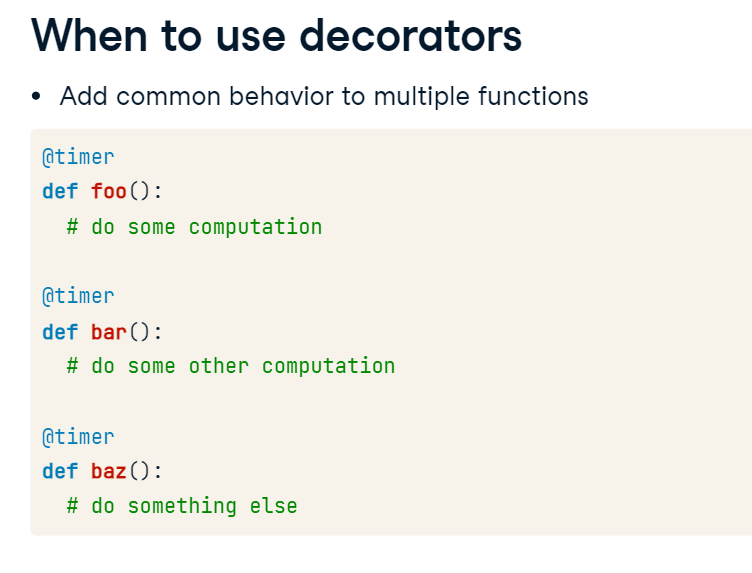

## Print the return type

In [ ]:
def print_return_type(func):
  # Define wrapper(), the decorated function
  def wrapper(*args, **kwargs):
    # Call the function being decorated
    result = func(*args, **kwargs)
    print('{}() returned type {}'.format(
      func.__name__, type(result)
    ))
    return result
  # Return the decorated function
  return wrapper
  
@print_return_type
def foo(value):
  return value
  
print(foo(42))
print(foo([1, 2, 3]))
print(foo({'a': 42}))